In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../src/"))
sys.path.append(os.path.abspath("../../LHAPDF-files/"))
from tools import PDFs
import matplotlib.pyplot as plt
import numpy as np
import lhapdf
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

LHAPDF 6.2.3 loading all 1 PDFs in set nCTEQ22_CJ15_208_82
nCTEQ22_CJ15_208_82, version 1; 1 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set nCTEQ22_SRC_DBOUBFIXED_208_82
nCTEQ22_SRC_DBOUBFIXED_208_82, version 1; 1 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQneu_208_82
nCTEQneu_208_82, version 1; 55 PDF members


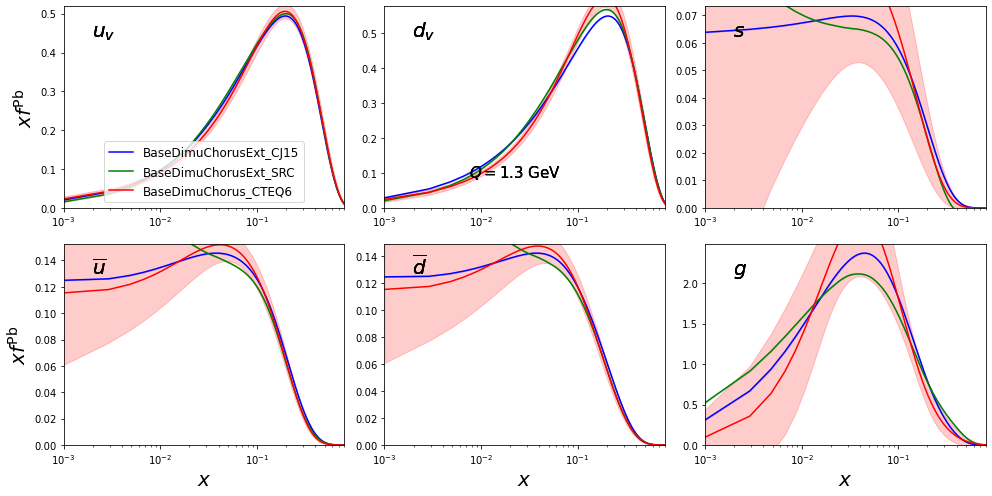

In [5]:
A=208
Z=82
base_cj15 = PDFs("nCTEQ22_CJ15_"+str(A)+"_"+str(Z), "sym", A, Z, True)
base_cteq6 = PDFs("nCTEQ22_SRC_DBOUBFIXED_"+str(A)+"_"+str(Z), "sym", A, Z, True) 
basedimuchorus = PDFs("nCTEQneu_"+str(A)+"_"+str(Z),"sym", A, Z, True )

#CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", A, Z, True)
mypdfs = [ [base_cj15, "blue", "-", "BaseDimuChorusExt_CJ15", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [base_cteq6, "green", "-", "BaseDimuChorusExt_SRC",  True, 0.2], 
           [basedimuchorus, "red", "-", "BaseDimuChorus_CTEQ6",  True, 0.2], 


]

flavors = ["uv", "dv", "s", "ubar", "dbar", "g"]
Q = 1.3# np.sqrt(4)
xlist = np.linspace(0.001, 0.95,500)
#xlist = np.logspace(-3,np.log10(0.95),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    #plt.axhline(1.0, linestyle="dotted")
    #plt.axhline(0.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        dp = np.sqrt(45.0/35.0)*dp 
        dm = np.sqrt(45.0/35.0)*dm
        denom, dpd, dmd = basedimuchorus.getPDFerrors(xlist, Q, flv)
        data_cteq =1
        plt.plot(xlist, (data/data_cteq), color=pdf[1], linestyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)/data_cteq), ((data-dp)/data_cteq), color=pdf[1], alpha=pdf[5])

        flvlabel = "$"+flv+"$"
        if (flv == "uv") : 
            flvlabel = "$u_v$"
        elif (flv =="dv") : 
            flvlabel= "$d_v$"
        elif flv=="ubar" : 
            flvlabel = r"$\overline{u}$"
        elif flv=="dbar" : 
            flvlabel = r"$\overline{d}$"


        #plt.xscale("logit" ,one_half="0.5")
        plt.xscale("log")
        if int(iflv/3)==1 : 
            plt.xlabel(r'${x}$',fontsize=20)
        if (iflv%3 ==0) : 
            plt.ylabel(r'${xf^{{\mathrm{{Pb}}}}}$',fontsize=20, rotation=90)
        plt.annotate(flvlabel, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        
        if (flv!="s") : 
            pass #plt.ylim(0.6, 1.4)
        else : 
            pass#plt.ylim(0., 2.4)

        if (iflv==0):
            plt.legend(loc="lower center", fontsize=12)
        if (iflv == 1) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        plt.gca().set_ylim(bottom=0)
        plt.xlim(0.001, 0.8)
    #ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        
plt.savefig("B.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_208_82
nCTEQ15WZSIHdet_p27_208_82, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set nCTEQ22_WODIJET_208_82
nCTEQ22_WODIJET_208_82, version 1; 1 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set nCTEQ22_NODIJET_CTEQ6_208_82
nCTEQ22_NODIJET_CTEQ6_208_82, version 1; 1 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set nCTEQ22_208_82
nCTEQ22_208_82, version 1; 1 PDF members


/tmp/ipykernel_220854/766557487.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_220854/766557487.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_220854/766557487.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_220854/766557487.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_220854/766557487.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 

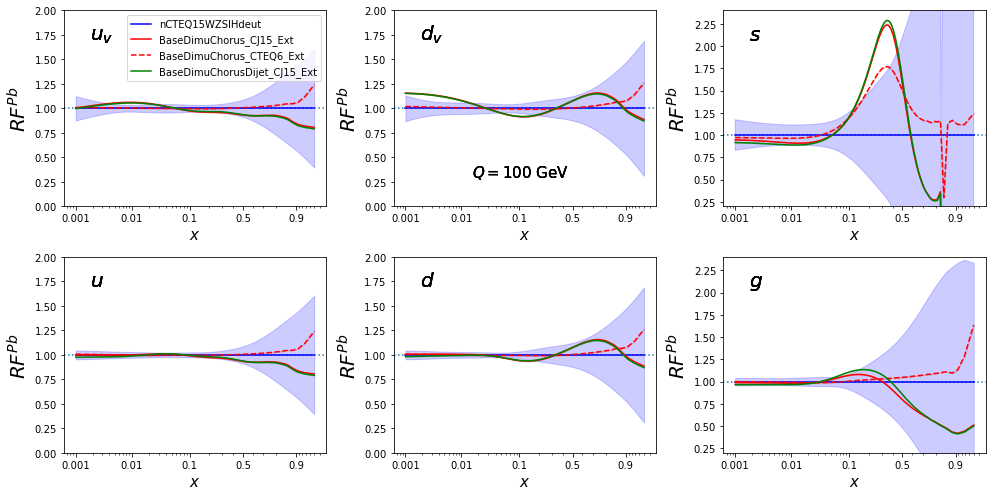

In [7]:

base = PDFs("nCTEQ15WZSIHdet_p27_208_82", "sym", 208, 82, True)
nCTEQ22_nodijet =  PDFs("nCTEQ22_WODIJET_208_82", "sym", 208, 82, True)
nCTEQ22_nodijet_cteq6 =  PDFs("nCTEQ22_NODIJET_CTEQ6_208_82", "sym", 208, 82, True)
nCTEQ22_dijet =  PDFs("nCTEQ22_208_82", "sym", 208, 82, True)

mypdfs = [ [base, "blue", "-", "nCTEQ15WZSIHdeut", True, 0.2], #pdf, color, linestyle, label,  error, allpha
           [nCTEQ22_nodijet, "red", "-", "BaseDimuChorus_CJ15_Ext",  True, 0.2], 
            [nCTEQ22_nodijet_cteq6, "red", "dashed", "BaseDimuChorus_CTEQ6_Ext", True, 0.2], 
              [nCTEQ22_dijet, "green", "-", "BaseDimuChorusDijet_CJ15_Ext", True, 0.2], 

]

flavors = ["uv", "dv", "s", "u", "d", "g"]
Q = 100
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.95),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    plt.axhline(1.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        data_cteq, dpc, dmc = base.getPDFerrors(xlist, Q, flv)

        plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, (data+dp)/data_cteq, (data-dp)/data_cteq, color=pdf[1], alpha=pdf[5])

        plt.xscale("logit" ,one_half="0.5")
        plt.xlabel('$x$',fontsize=15)
        plt.ylabel(r'$RF^{Pb}$ ',fontsize=20, rotation=90)
        if (flv=="uv") : 
            plt.annotate("${}$".format("u_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        elif flv=="dv": 
            plt.annotate("${}$".format("d_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        else : 
            plt.annotate("${}$".format(flv).format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        
        if (flv!="s" and flv!="g") : 
            plt.ylim(0., 2.0)
        else : 
            plt.ylim(0.2, 2.4)
            
        if (iflv==0):
            plt.legend()
        if (iflv == 1) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        
plt.savefig("fratio-bound.pdf", bbox_inches="tight")

1


In [2]:
xlist = np.logspace(-3,np.log10(0.95),20)
Q=1.300001
#print(base.getPDFerrors(xlist, Q, "g")[0])
#print(dimuneu_.getPDFerrors(xlist, Q, "g")[0])
#print(dimuneu.Nmembers, dimuneu.Z, dimuneu.A, )
#dimuneu.pdfset[1]
dn = lhapdf.getPDFSet("DimuNeuCCFRcut_56_26").mkPDFs()
#
# print(dimuneu_.getPDFerrors(xlist, Q, "g")[0])

LHAPDF 6.2.3 loading all 41 PDFs in set DimuNeuCCFRcut_56_26
DimuNeuCCFRcut_56_26, version 1; 41 PDF members


LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_56_26
nCTEQ15WZSIHdet_p27_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 45 PDFs in set DimuNeu_56_26
DimuNeu_56_26, version 1; 45 PDF members
LHAPDF 6.2.3 loading all 33 PDFs in set nCTEQ15_56_26
nCTEQ15_56_26, version 1; 33 PDF members
LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members


/tmp/ipykernel_9996/773412670.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_9996/773412670.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_9996/773412670.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_9996/773412670.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_9996/773412670.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed tw

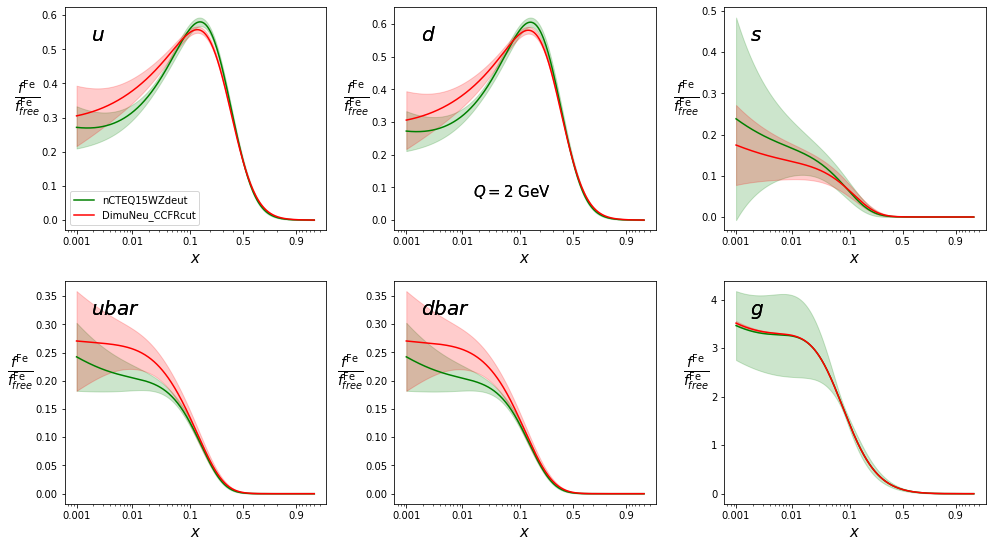

In [5]:

base = PDFs("nCTEQ15WZSIHdet_p27_56_26", "sym", 56, 26, True)
#dimuneu = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
dimuneu = PDFs("DimuNeu_56_26", "sym", 56, 26, True) #with CCFR cut
nCTEQ15 = PDFs("nCTEQ15_56_26", "sym", 56, 26, True)
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 56, 26, True)
mypdfs = [ [base, "green", "-", "nCTEQ15WZdeut", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [dimuneu, "red", "-", "DimuNeu_CCFRcut", True, 0.2], 
            #[dimuneu_, "blue", "-", "DimuNeu_", True, True, 0.2], 

]

flavors = ["u", "d", "s", "ubar", "dbar", "g"]
Q = 2
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.95),300)
plt.figure(1,figsize=(14,11))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((3,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)), ((data-dp)), color=pdf[1], alpha=pdf[5])


        plt.xscale("logit" ,one_half="0.5")
        plt.xlabel('$x$',fontsize=15)
        plt.ylabel(r'$\frac{f^{{\mathrm{{Fe}}}}}{f^{{\mathrm{{Fe}}}}_{free}}$    ',fontsize=20, rotation=0)
        if (flv=="uv") : 
            plt.annotate("${}$".format("u_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        elif flv=="dv": 
            plt.annotate("${}$".format("d_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        else : 
            plt.annotate("${}$".format(flv).format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        
        if (flv!="s") : 
            pass#plt.ylim(0.6, 1.4)
        else : 
            pass#plt.ylim(0.2, 2.4)

        if (iflv==0):
            plt.legend()
        if (iflv == 1) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        
plt.savefig("PDF-full.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_56_26
nCTEQ15WZSIHdet_p27_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 41 PDFs in set DimuNeu_ccfrcut_p20_56_26
DimuNeu_ccfrcut_p20_56_26, version 1; 41 PDF members
LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members


posx and posy should be finite values


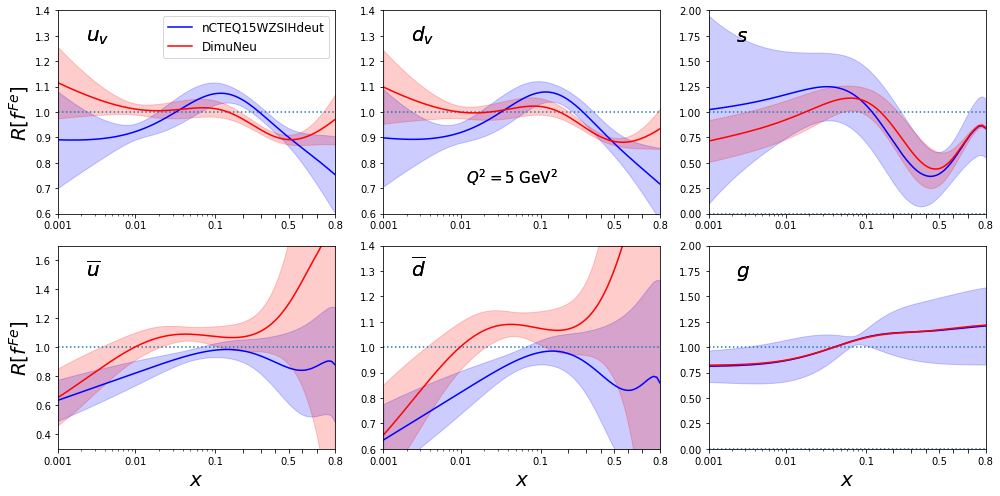

In [22]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)

base = PDFs("nCTEQ15WZSIHdet_p27_56_26", "sym", 56, 26, True)
#base_2 = PDFs("nCTEQ15WZSIHdeut_p19_56_28", "sym", 56, 26, True)
#base_3= PDFs("nCTEQ15WZdeut_pcj_p19_56_28", "sym", 56, 26, True)

dimuneu = PDFs("DimuNeu_ccfrcut_p20_56_26", "sym", 56, 26, True)
#dimuneu_nocut = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 56, 26, True)
mypdfs = [ [base, "blue", "-", "nCTEQ15WZSIHdeut", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
            #[base_2, "red", "-", "nCTEQ15WZSIHdeut_p19", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
            #[base_3, "green", "-", "nCTEQ15WZdeut_p19", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [dimuneu, "red", "-", "DimuNeu",  True, 0.2], 
           # [dimuneu_nocut, "blue", "-", "DimuNeu", True, 0.2], 

]

flavors = ["uv", "dv", "s", "ubar", "dbar", "g"]
Q = np.sqrt(5)
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.8),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    plt.axhline(1.0, linestyle="dotted")
    plt.axhline(0.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        data_cteq, dpc, dmc = CTEQ.getPDFerrors(xlist, Q, flv) 

        plt.plot(xlist, (data/data_cteq), color=pdf[1], linestyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)/data_cteq), ((data-dp)/data_cteq), color=pdf[1], alpha=pdf[5])


        plt.xscale("logit" ,one_half="0.5")

        flvlabel = "$"+flv+"$"
        if (flv == "uv") : 
            flvlabel = "$u_v$"
        elif (flv =="dv") : 
            flvlabel= "$d_v$"
        elif flv=="ubar" : 
            flvlabel = r"$\overline{u}$"
        elif flv=="dbar" : 
            flvlabel = r"$\overline{d}$"


        plt.xscale("logit" ,one_half="0.5")
        if int(iflv/3)==1 : 
            plt.xlabel(r'$x$',fontsize=20)
        if (iflv%3 ==0) : 
            plt.ylabel(r'$R[f^{Fe}]$',fontsize=20, rotation=90)
        plt.annotate(flvlabel, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)        
        
        if (flv!="s" and flv!="g" and flv!="ubar") : 
            plt.ylim(0.6, 1.4)
        elif flv== "ubar" : 
            plt.ylim(0.3, 1.7)
        else : 
            plt.ylim(0., 2.0)

        if (iflv==0):
            plt.legend(fontsize=12)
        if (iflv == 1) : 
            plt.annotate("$Q^2={}\ \mathrm{{GeV}}^2$".format(5), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        #print(ax.get_xticklabels())
        ax.set_xticks([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
        ax.set_xticklabels(["0.001", "0.01", "0.1","", "", "", "0.5","", "", "0.8","0.9", "0.95"])
        ax.xaxis.set_minor_formatter(NullFormatter())
        #ax.tick_params(axis='both', which='major', labelsize=8)
        #ax.tick_params(axis='both', which='minor', labelsize=8)
        plt.xlim(0.001, 0.8)


plt.savefig("fratio-full_iron.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_208_82
nCTEQ15WZSIHdet_p27_208_82, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 41 PDFs in set DimuNeu_ccfrcut_p20_208_82
DimuNeu_ccfrcut_p20_208_82, version 1; 41 PDF members
LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members


posx and posy should be finite values


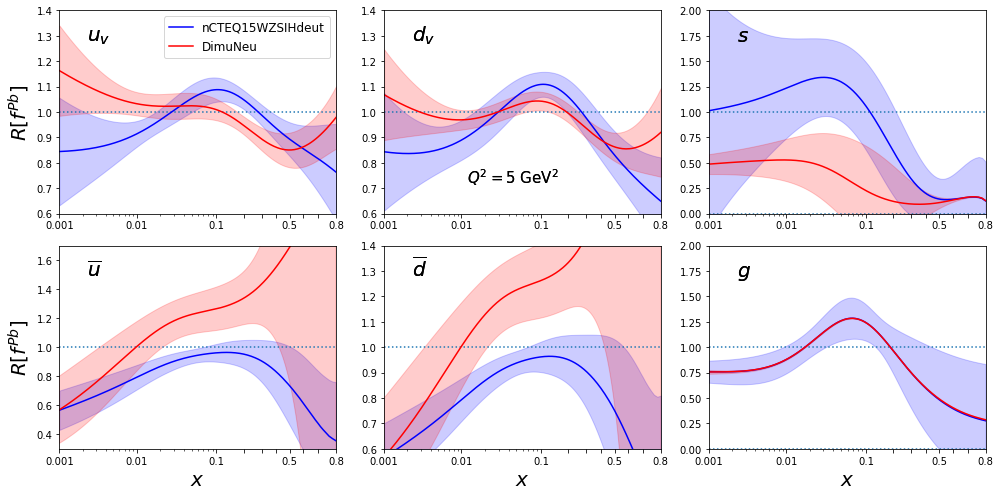

In [25]:

base = PDFs("nCTEQ15WZSIHdet_p27_208_82", "sym", 208, 82, True)
#base_2 = PDFs("nCTEQ15WZSIHdeut_p19_56_28", "sym", 56, 26, True)
#base_3= PDFs("nCTEQ15WZdeut_pcj_p19_56_28", "sym", 56, 26, True)

dimuneu = PDFs("DimuNeu_ccfrcut_p20_208_82", "sym", 208, 82, True)
#dimuneu_nocut = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 208, 82, True)
mypdfs = [ [base, "blue", "-", "nCTEQ15WZSIHdeut", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
            #[base_2, "red", "-", "nCTEQ15WZSIHdeut_p19", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
            #[base_3, "green", "-", "nCTEQ15WZdeut_p19", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [dimuneu, "red", "-", "DimuNeu",  True, 0.2], 
           # [dimuneu_nocut, "blue", "-", "DimuNeu", True, 0.2], 

]

flavors = ["uv", "dv", "s", "ubar", "dbar", "g"]
Q = np.sqrt(5)
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.8),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    plt.axhline(1.0, linestyle="dotted")
    plt.axhline(0.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        data_cteq, dpc, dmc = CTEQ.getPDFerrors(xlist, Q, flv) 

        plt.plot(xlist, (data/data_cteq), color=pdf[1], linestyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)/data_cteq), ((data-dp)/data_cteq), color=pdf[1], alpha=pdf[5])


        plt.xscale("logit" ,one_half="0.5")

        flvlabel = "$"+flv+"$"
        if (flv == "uv") : 
            flvlabel = "$u_v$"
        elif (flv =="dv") : 
            flvlabel= "$d_v$"
        elif flv=="ubar" : 
            flvlabel = r"$\overline{u}$"
        elif flv=="dbar" : 
            flvlabel = r"$\overline{d}$"


        plt.xscale("logit" ,one_half="0.5")
        if int(iflv/3)==1 : 
            plt.xlabel(r'${x}$',fontsize=20)
        if (iflv%3 ==0) : 
            plt.ylabel(r'$R[f^{Pb}]$',fontsize=20, rotation=90)
        plt.annotate(flvlabel, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)        
        
        if (flv!="s" and flv!="g" and flv!="ubar") : 
            plt.ylim(0.6, 1.4)
        elif flv== "ubar" : 
            plt.ylim(0.3, 1.7)
        else : 
            plt.ylim(0., 2.0)

        if (iflv==0):
            plt.legend(fontsize=12)
        if (iflv == 1) : 
            plt.annotate("$Q^2={}\ \mathrm{{GeV}}^2$".format(5), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        ax.set_xticks([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
        ax.set_xticklabels(["0.001", "0.01", "0.1","", "", "", "0.5","", "", "0.8","0.9", "0.95"])
        ax.xaxis.set_minor_formatter(NullFormatter())
        plt.xlim(0.001, 0.8)
        
plt.savefig("fratio-full_lead.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_56_26
nCTEQ15WZSIHdet_p27_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQneu_56_26
nCTEQneu_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set BaseDimuNeu_56_26
BaseDimuNeu_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set BaseDimuNeuX_56_26
BaseDimuNeuX_56_26, version 1; 55 PDF members


posx and posy should be finite values


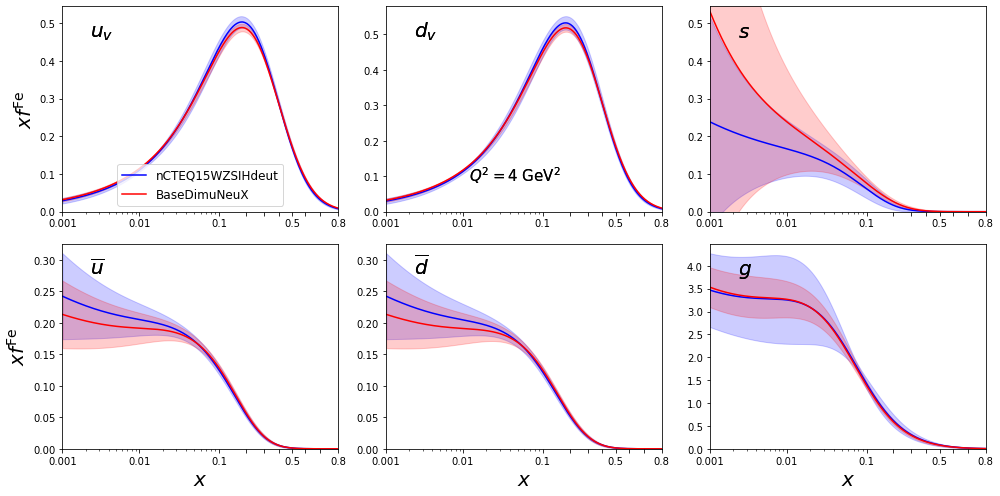

In [33]:
A=56
Z=26
base = PDFs("nCTEQ15WZSIHdet_p27_"+str(A)+"_"+str(Z), "sym", A, Z, True)
#dimuneu = PDFs("DimuNeu_ccfrcut_p20_"+str(A)+"_"+str(Z), "sym", A, Z, True)
basechorus = PDFs("nCTEQneu_"+str(A)+"_"+str(Z),"sym", A, Z, True )
bdm = PDFs("BaseDimuNeu_"+str(A)+"_"+str(Z), "sym", A, Z, True)
bdmx = PDFs("BaseDimuNeuX_"+str(A)+"_"+str(Z), "sym", A, Z, True)
#CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", A, Z, True)
mypdfs = [ [base, "blue", "-", "nCTEQ15WZSIHdeut", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
             #[base_2, "red", "-", "nCTEQ15WZSIHdeut_p19", True, 0.1], #pdf, color, linestyle, label, fullnuc, error, allpha
           #[dimuneu, "red", "-", "DimuNeu", True, 0.2], 
          #[basechorus, "green", "-", "BaseDimuChorus",  True, 0.2], 
           #[bdm, "red", "-", "BaseDimuNeu",  False, 0.2]
          [bdmx, "red", "-", "BaseDimuNeuX",  True, 0.2]
]

flavors = ["uv", "dv", "s", "ubar", "dbar", "g"]
Q = np.sqrt(4)
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.95),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    #plt.axhline(1.0, linestyle="dotted")
    #plt.axhline(0.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        dp = np.sqrt(45.0/35.0)*dp 
        dm = np.sqrt(45.0/35.0)*dm
        data_cteq =1.0#, dpd, dmd = base.getPDFerrors(xlist, Q, flv)
        plt.plot(xlist, (data/data_cteq), color=pdf[1], linestyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)/data_cteq), ((data-dp)/data_cteq), color=pdf[1], alpha=pdf[5])

        flvlabel = "$"+flv+"$"
        if (flv == "uv") : 
            flvlabel = "$u_v$"
        elif (flv =="dv") : 
            flvlabel= "$d_v$"
        elif flv=="ubar" : 
            flvlabel = r"$\overline{u}$"
        elif flv=="dbar" : 
            flvlabel = r"$\overline{d}$"


        plt.xscale("logit" ,one_half="0.5")
        if int(iflv/3)==1 : 
            plt.xlabel(r'${x}$',fontsize=20)
        if (iflv%3 ==0) : 
            plt.ylabel(r'${xf^{{\mathrm{{Fe}}}}}$',fontsize=20, rotation=90)
        plt.annotate(flvlabel, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        
        if (flv!="s") : 
            pass#plt.ylim(0.6, 1.4)
        else : 
            pass#plt.ylim(0., 2.4)

        if (iflv==0):
            plt.legend(loc="lower center", fontsize=12)
        if (iflv == 1) : 
            plt.annotate("$Q^2={}\ \mathrm{{GeV}}^2$".format(4), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        #ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        plt.gca().set_ylim(bottom=0)
        ax.set_xticks([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
        ax.set_xticklabels(["0.001", "0.01", "0.1","", "", "", "0.5","", "", "0.8","0.9", "0.95"])
        ax.xaxis.set_minor_formatter(NullFormatter())
        plt.xlim(0.001, 0.8)
        
plt.savefig("Base-BaseDimuNeuX_FE.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_56_26
nCTEQ15WZSIHdet_p27_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQneu_56_26
nCTEQneu_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set BaseDimuNeu_56_26
BaseDimuNeu_56_26, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set BaseDimuNeuX_56_26
BaseDimuNeuX_56_26, version 1; 55 PDF members


/tmp/ipykernel_68087/2723218192.py:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data/data_cteq), color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_68087/2723218192.py:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data/data_cteq), color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_68087/2723218192.py:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data/data_cteq), color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_68087/2723218192.py:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data/data_cteq), color=pdf[1], lineSt

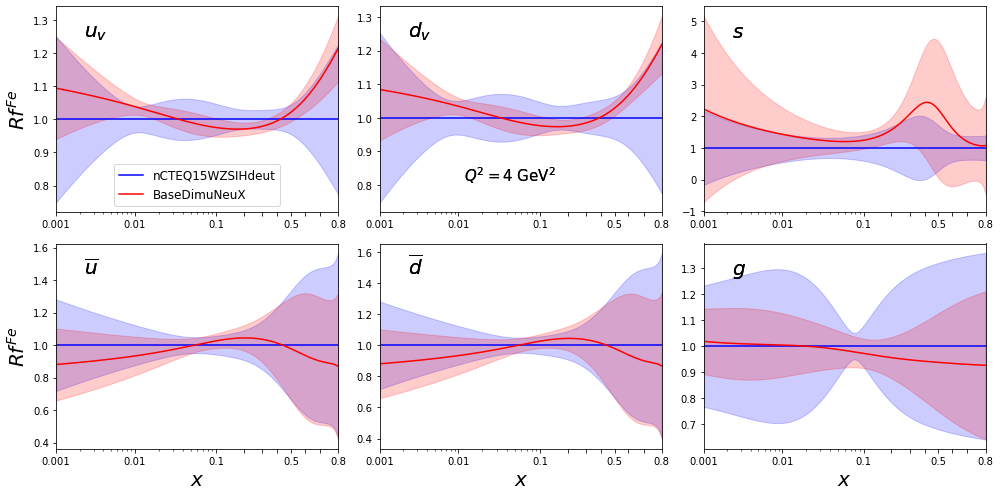

In [34]:
A=56
Z=26
base = PDFs("nCTEQ15WZSIHdet_p27_"+str(A)+"_"+str(Z), "sym", A, Z, True)
#dimuneu = PDFs("DimuNeu_ccfrcut_p20_"+str(A)+"_"+str(Z), "sym", A, Z, True)
basechorus = PDFs("nCTEQneu_"+str(A)+"_"+str(Z),"sym", A, Z, True )
bdm = PDFs("BaseDimuNeu_"+str(A)+"_"+str(Z), "sym", A, Z, True)
bdmx = PDFs("BaseDimuNeuX_"+str(A)+"_"+str(Z), "sym", A, Z, True)
#CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", A, Z, True)
mypdfs = [ [base, "blue", "-", "nCTEQ15WZSIHdeut", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
             #[base_2, "red", "-", "nCTEQ15WZSIHdeut_p19", True, 0.1], #pdf, color, linestyle, label, fullnuc, error, allpha
           #[dimuneu, "red", "-", "DimuNeu", True, 0.2], 
          #[basechorus, "green", "-", "BaseDimuChorus",  True, 0.2], 
           #[bdm, "red", "-", "BaseDimuNeu",  False, 0.2]
          [bdmx, "red", "-", "BaseDimuNeuX",  True, 0.2]
]

flavors = ["uv", "dv", "s", "ubar", "dbar", "g"]
Q = np.sqrt(4)
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.8),500)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    #plt.axhline(1.0, linestyle="dotted")
    #plt.axhline(0.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        dp = np.sqrt(45.0/35.0)*dp 
        dm = np.sqrt(45.0/35.0)*dm
        data_cteq, dpd, dmd = base.getPDFerrors(xlist, Q, flv)
        plt.plot(xlist, (data/data_cteq), color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)/data_cteq), ((data-dp)/data_cteq), color=pdf[1], alpha=pdf[5])

        flvlabel = "$"+flv+"$"
        if (flv == "uv") : 
            flvlabel = "$u_v$"
        elif (flv =="dv") : 
            flvlabel= "$d_v$"
        elif flv=="ubar" : 
            flvlabel = r"$\overline{u}$"
        elif flv=="dbar" : 
            flvlabel = r"$\overline{d}$"


        plt.xscale("logit" ,one_half="0.5")
        if int(iflv/3)==1 : 
            plt.xlabel(r'${x}$',fontsize=20)
        if (iflv%3 ==0) : 
            plt.ylabel(r'$Rf^{Fe}$',fontsize=20, rotation=90)
        plt.annotate(flvlabel, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
    
        
        
        if (flv!="s") : 
            pass#plt.ylim(0.6, 1.4)
        else : 
            pass#plt.ylim(0., 2.4)

        if (iflv==0):
            plt.legend(loc="lower center", fontsize=12)
        if (iflv == 1) : 
            plt.annotate("$Q^2={}\ \mathrm{{GeV}}^2$".format(4), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        plt.xscale("logit" ,one_half="0.5")
        ax.set_xticks([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
        ax.set_xticklabels(["0.001", "0.01", "0.1","", "", "", "0.5","", "", "0.8","0.9", "0.95"])
        ax.xaxis.set_minor_formatter(NullFormatter())
        plt.xlim(0.001, 0.8)
        
plt.savefig("RBase-BaseDimuNeuX_FE.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 33 PDFs in set nCTEQ15_208_82
nCTEQ15_208_82, version 1; 33 PDF members
LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZSIH_208_82
nCTEQ15WZSIH_208_82, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_208_82
nCTEQ15WZSIHdet_p27_208_82, version 1; 55 PDF members


/tmp/ipykernel_68087/3654734270.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_nc, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_68087/3654734270.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_nc, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_68087/3654734270.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_nc, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_68087/3654734270.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_nc, color=pdf[1], lineStyle=pdf[2], labe

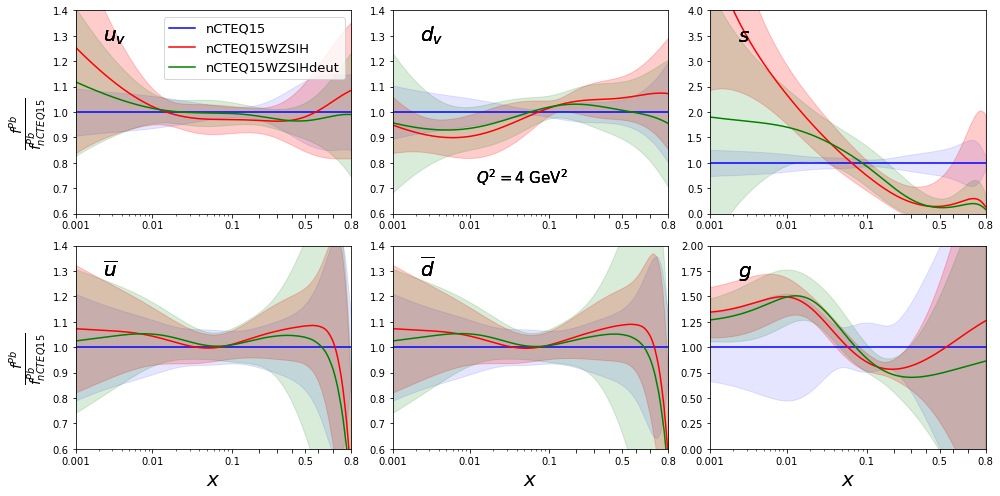

In [29]:

nCTEQ15 = PDFs("nCTEQ15_208_82", "sym", 208, 82, True)
#WZ = PDFs("nCTEQ15WZ_208_82", "sym", 208, 82, True)
WZSIH = PDFs("nCTEQ15WZSIH_208_82", "sym", 208, 82, True)
WZSIHdeu = PDFs("nCTEQ15WZSIHdet_p27_208_82", "sym", 208, 82, True)
mypdfs = [ #[WZ, "cyan", "-", "nCTEQ15WZ", True, 0.1], #pdf, color, linestyle, label,  error, allpha
            [nCTEQ15, "blue", "-", "nCTEQ15", True, 0.1],
           [WZSIH, "red", "-", "nCTEQ15WZSIH", True, 0.2], 
           # [nCTEQ15, "blue", "-", "nCTEQ15", True, True, 0.2],            [basedimuneux, "blue", "-", "BaseDimuNeuX",  True, 0.2], 
             [WZSIHdeu, "green", "-", "nCTEQ15WZSIHdeut", True, 0.15]
        ]

flavors = ["uv", "dv", "s", "ubar", "dbar", "g"]
Q = 2.0
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.8),500)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    #plt.axhline(1.0, linestyle="dotted")
    data_nc, dp_nc, dm_nc = mypdfs[0][0].getPDFerrors(xlist, Q, flv)
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        

        plt.plot(xlist, data/data_nc, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, (data+dp)/data_nc, (data-dp)/data_nc, color=pdf[1], alpha=pdf[5])

        flvlabel = "$"+flv+"$"
        if (flv == "uv") : 
            flvlabel = "$u_v$"
        elif (flv =="dv") : 
            flvlabel= "$d_v$"
        elif flv=="ubar" : 
            flvlabel = r"$\overline{u}$"
        elif flv=="dbar" : 
            flvlabel = r"$\overline{d}$"


        plt.xscale("logit" ,one_half="0.5")
        if int(iflv/3)==1 : 
            plt.xlabel(r'${x}$',fontsize=20)
        if (iflv%3 ==0) : 
            plt.ylabel(r'${\frac{f^{Pb}}{f^{Pb}_{{nCTEQ15}}}}$    ',fontsize=20, rotation=90)
        plt.annotate(flvlabel, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        if (flv=="g") : 
            plt.ylim(0.0, 2.0)
        elif (flv!="s") : 
            plt.ylim(0.6, 1.4)
        else : 
            plt.ylim(0.0, 4.)

        #plt.xlim(0.001, 0.8)
            
        if (iflv==0):
            plt.legend(fontsize=13)
        if (iflv == 1) : 
            plt.annotate("$Q^2={}\ \mathrm{{GeV}}^2$".format(int(4)), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        #ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        #print(ax.get_xticklabels())
        plt.xscale("logit" ,one_half="0.5")
        ax.set_xticks([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
        ax.set_xticklabels(["0.001", "0.01", "0.1","", "", "", "0.5","", "", "0.8","0.9", "0.95"])
        ax.xaxis.set_minor_formatter(NullFormatter())
        plt.xlim(0.001, 0.8)
        
plt.savefig("WZSIH.pdf", bbox_inches="tight")

In [22]:
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 1,1)
xlist = np.linspace(0.8, 1.0,500)
dt, dp, dm = CTEQ.getPDFerrors(xlist, 1.30001, "dv", True)
for x, f in zip(xlist, dt ) : 
    if (f<0.0) : 
        print(x, end= ", ")

LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members
0.9759519038076152, 0.9763527054108216, 0.9767535070140281, 0.9771543086172345, 0.9775551102204408, 0.9779559118236473, 0.9783567134268537, 0.9787575150300601, 0.9791583166332665, 0.9795591182364729, 0.9799599198396793, 0.9803607214428858, 0.9807615230460922, 0.9811623246492986, 0.981563126252505, 0.9819639278557114, 0.9823647294589178, 0.9827655310621243, 0.9831663326653306, 0.983567134268537, 0.9839679358717435, 0.9843687374749499, 0.9847695390781563, 0.9851703406813628, 0.9855711422845691, 0.9859719438877755, 0.986372745490982, 0.9867735470941884, 0.9871743486973947, 0.9875751503006012, 0.9879759519038076, 0.988376753507014, 0.9887775551102205, 0.9891783567134269, 0.9895791583166332, 0.9899799599198397, 0.9903807615230461, 0.9907815631262524, 0.9911823647294589, 0.9915831663326653, 0.9919839679358717, 0.9923847695390782, 0.9927855711422846, 0.993186372745491, 0.9935

LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_56_26
nCTEQ15WZdeut_pcj_p19_56_26, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeutDimu_pcj_p19_56_26
nCTEQ15WZdeutDimu_pcj_p19_56_26, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 33 PDFs in set nCTEQ15_56_26
nCTEQ15_56_26, version 1; 33 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set BaseDimuAllNeu_56_26
BaseDimuAllNeu_56_26, version 1; 1 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set BaseDimuAllNeux01_56_26
BaseDimuAllNeux01_56_26, version 1; 1 PDF members
LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members


/tmp/ipykernel_88968/965107807.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data), color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_88968/965107807.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data), color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_88968/965107807.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data), color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_88968/965107807.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, (data), color=pdf[1], lineStyle=pdf[2], label = pdf[3])


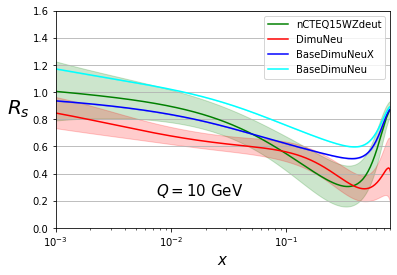

In [9]:

base = PDFs("nCTEQ15WZdeut_pcj_p19_56_26", "sym", 56, 26, True)
dimuneu = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
basedimu =  PDFs("nCTEQ15WZdeutDimu_pcj_p19_56_26", "sym", 56, 26, True)
nCTEQ15 = PDFs("nCTEQ15_56_26", "sym", 56, 26, True)
basedimuneu = PDFs("BaseDimuAllNeu_56_26", "sym", 56, 26, True)
basedimuneux = PDFs("BaseDimuAllNeux01_56_26", "sym", 56, 26, True)
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 1, 1)
mypdfs = [ [base, "green", "-", "nCTEQ15WZdeut", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [dimuneu, "red", "-", "DimuNeu", True, 0.2], 
           # [nCTEQ15, "blue", "-", "nCTEQ15", True, True, 0.2], 
            [basedimuneux, "blue", "-", "BaseDimuNeuX",  True, 0.2], 
             [basedimuneu, "cyan", "-", "BaseDimuNeu", True, 0.2]

]

Q = 10
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.95),300)
plt.figure(1,figsize=(6,4))
for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, "kappa")
        plt.plot(xlist, (data), color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)), ((data-dp)), color=pdf[1], alpha=pdf[5])



        plt.ylim(0., 1.6)
        plt.xlim(0.001, 0.8)
#plt.grid("both")
plt.xscale("log")
plt.xlabel('$x$',fontsize=15)
plt.ylabel(r'$R_s$    ',fontsize=20, rotation=0)
plt.grid(axis="y")

plt.legend()
plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
plt.savefig("Rs.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_56_26
nCTEQ15WZdeut_pcj_p19_56_26, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 33 PDFs in set nCTEQ15_56_26
nCTEQ15_56_26, version 1; 33 PDF members


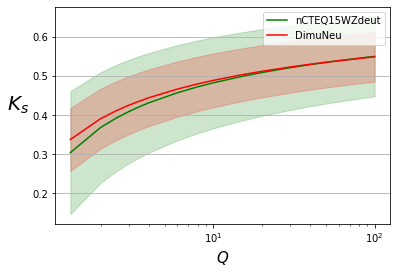

In [10]:
from tools import PDFs
from scipy.integrate import quad

def getxPDF (x, Q, pdf, i, flv) : 
    return x*pdf.getPDF(x, Q, flv)[i] 

def getKS (mypdf, Q) :
    kappas=[]
    for i in range(mypdf.Nmembers) : 
        intssb = quad(getxPDF, 0.000001, 1.0, args=(Q,mypdf,i, "ssb"))
        intubdb = quad(getxPDF, 0.000001, 1.0, args=(Q,mypdf,i, "ubdb"))
        kappas.append(intssb[0]/intubdb[0])
    cent = kappas[0]
    kappap = kappas[1::2]
    kappam = kappas[2::2]
    err = 0.5*np.sqrt(np.sum(np.array([
       (plus-minus)**2 for plus, minus in zip(kappap, kappam)
    ])))
    return cent, err

base = PDFs("nCTEQ15WZdeut_pcj_p19_56_26", "sym", 56, 26, True)
dimuneu = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
nCTEQ15 = PDFs("nCTEQ15_56_26", "sym", 56, 26, True)
mypdfs = [ [base, "green", "-", "nCTEQ15WZdeut", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [dimuneu, "red", "-", "DimuNeu", True, 0.2], 
           # [nCTEQ15, "blue", "-", "nCTEQ15", True, True, 0.2], 
]

Ql = [1.3, 2., 2.5, 3., 3.5, 4., 6., 8., 10., 15., 20., 30., 40., 50., 60., 90., 100.]
#Ql=[1.3, 6.0]
for pdf in mypdfs : 
    data=[]
    err = []
    for Q in Ql : 
        a, b= getKS(pdf[0], Q)
        data.append(a)
        err.append(b)

    data= np.array(data)
    err=np.array(err)
    plt.plot(Ql, data, color=pdf[1], linestyle=pdf[2], label=pdf[3])
    plt.fill_between(Ql, data+err, data-err, color=pdf[1], alpha=pdf[5])


plt.xscale("log")
plt.legend()
plt.grid(axis="y")
plt.xlabel('$Q$',fontsize=15)
plt.ylabel(r'$K_s$    ',fontsize=20, rotation=0)
plt.savefig("Ks.pdf", bbox_inches="tight")


LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members


/tmp/ipykernel_88968/157794302.py:18: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xlist, data/np.array([getSSB(x) for x in xlist]), label="SSB CTEQ/direct")


Text(0, 0.5, 'Ratio')

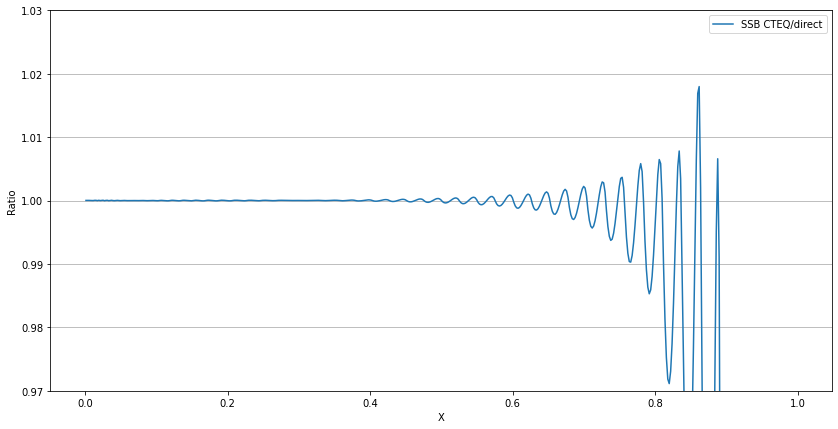

In [12]:
p0bar =  0.0465818
p0=0.5
p1=-0.32390
p2 = 8.11550
p3 = 0.41321
p4 = 4.75394
p5 = 0.61366

def getSSB (x) : 
    return p0*p0bar*(x)**p1*(1.-x)**p2*(np.exp(p3*x))*(1.+np.exp(p4)*x)**p5

CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 1, 1)
Q = 1.3
xlist = np.linspace(0.001, 1.0,500)
#xlist = np.logspace(-3,np.log10(0.95),100)
data, dp, dm = CTEQ.getPDFerrors(xlist, 1.30001, "ssb")
plt.figure(1,figsize=(14,7))
plt.plot(xlist, data/np.array([getSSB(x) for x in xlist]), label="SSB CTEQ/direct")
#plt.yscale("log")
plt.grid(axis="y")
plt.ylim(0.97, 1.03)
plt.legend()
plt.xlabel("X")
plt.ylabel("Ratio")
#plt.xscale("Log")
#plt.plot(xlist, , linestyle="dashed", label="Direct")


LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 59 PDFs in set CT18NLO_1_1
CT18NLO_1_1, version 1; 59 PDF members
LHAPDF 6.2.3 loading all 49 PDFs in set CJ15nlo_1_1
CJ15nlo_1_1, version 2; 49 PDF members
LHAPDF 6.2.3 loading all 101 PDFs in set NNPDF31_nlo_as_0118
NNPDF31_nlo_as_0118, version 1; 101 PDF members
LHAPDF 6.2.3 loading all 65 PDFs in set MSHT20nlo_as118
MSHT20nlo_as118, version 3; 65 PDF members
LHAPDF 6.2.3 loading all 59 PDFs in set CTNLO_nonu
CTNLO_nonu, version 1; 59 PDF members


/tmp/ipykernel_113543/4153521549.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_113543/4153521549.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_113543/4153521549.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_113543/4153521549.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_113543/4153521549.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in

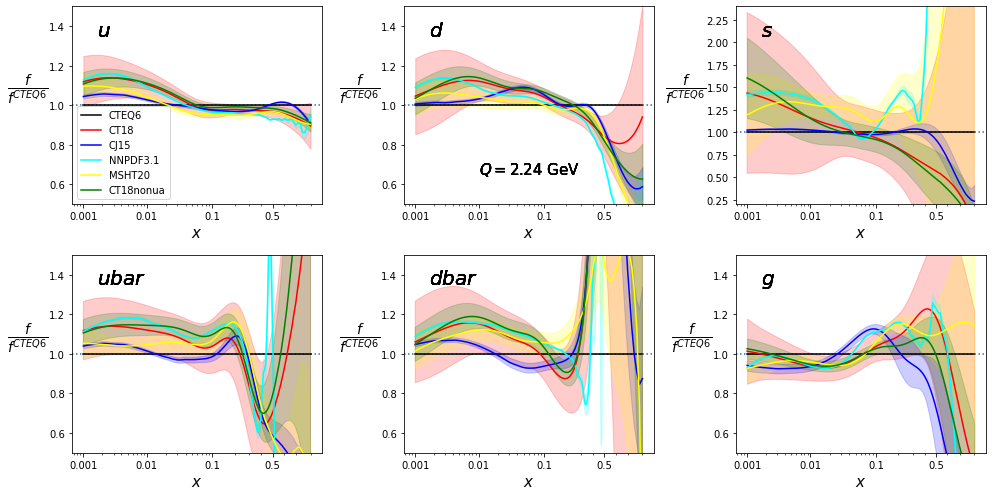

In [3]:
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 1, 1)
CT18 =PDFs("CT18NLO_1_1", "sym", 1, 1)
CJ15  = PDFs ("CJ15nlo_1_1", "sym", 1,1)
NNPDF31  = PDFs ("NNPDF31_nlo_as_0118", "MCreplica", 1,1)
MSHT20= PDFs ("MSHT20nlo_as118", "sym", 1,1)
CT18nonua= PDFs ("CTNLO_nonu", "sym", 1,1)

mypdfs = [ [CTEQ, "black", "-", "CTEQ6",  True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [CT18, "red", "-", "CT18", True, 0.2], 
            [CJ15, "blue", "-", "CJ15", True, 0.2], 
            [NNPDF31, "cyan", "-", "NNPDF3.1", True, 0.2], 
             [MSHT20, "yellow", "-", "MSHT20", True, 0.2], 
             [CT18nonua , "green", "-", "CT18nonua", True, 0.2]
]

flavors = ["u", "d", "s", "ubar", "dbar", "g"]
Q = 2.24
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.8),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    plt.axhline(1.0, linestyle="dotted")
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        data_cteq, dpc, dmc = CTEQ.getPDFerrors(xlist, Q, flv)

        plt.plot(xlist, data/data_cteq, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, (data+dp)/data_cteq, (data-dp)/data_cteq, color=pdf[1], alpha=pdf[5])

        plt.xscale("logit" ,one_half="0.5")
        plt.xlabel('$x$',fontsize=15)
        plt.ylabel(r'$\frac{f}{f^{CTEQ6}}$      ',fontsize=20, rotation=0)
        if (flv=="uv") : 
            plt.annotate("${}$".format("u_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        elif flv=="dv": 
            plt.annotate("${}$".format("d_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        else : 
            plt.annotate("${}$".format(flv).format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        
        if (flv!="s") : 
            plt.ylim(0.5, 1.5)
        else : 
            plt.ylim(0.2, 2.4)
            
        if (iflv==0):
            plt.legend()
        if (iflv == 1) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        
plt.savefig("fratio-bound.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 47 PDFs in set DimuAllNeu_56_26
DimuAllNeu_56_26, version 1; 47 PDF members
LHAPDF 6.2.3 loading all 39 PDFs in set nCTEQ15WZdeut_pcj_p19_1_1
nCTEQ15WZdeut_pcj_p19_1_1, version 1; 39 PDF members
LHAPDF 6.2.3 loading all 59 PDFs in set CT18NLO_1_1
CT18NLO_1_1, version 1; 59 PDF members
LHAPDF 6.2.3 loading all 49 PDFs in set CJ15nlo_1_1
CJ15nlo_1_1, version 2; 49 PDF members
LHAPDF 6.2.3 loading all 101 PDFs in set NNPDF31_nlo_as_0118
NNPDF31_nlo_as_0118, version 1; 101 PDF members
LHAPDF 6.2.3 loading all 65 PDFs in set MSHT20nlo_as118
MSHT20nlo_as118, version 3; 6

/tmp/ipykernel_88968/1414199755.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_base, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_88968/1414199755.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_88968/1414199755.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data/data_base, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_88968/1414199755.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
/tmp/ipykernel_88968/1414199755.py:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 

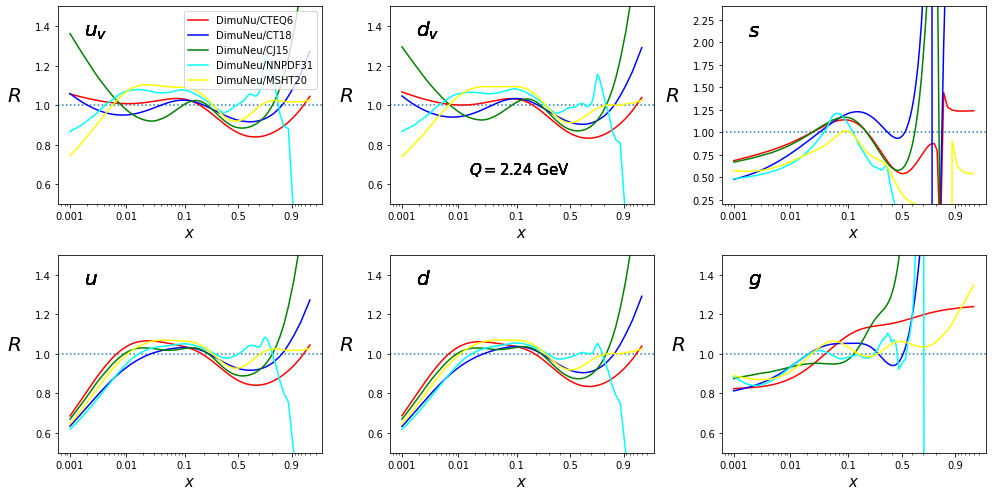

In [31]:
dimuneu = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
dimuneu2 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
dimuneu3 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
dimuneu4 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
dimuneu5 = PDFs("DimuAllNeu_56_26", "sym", 56, 26, True)
CTEQ =PDFs("nCTEQ15WZdeut_pcj_p19_1_1", "sym", 56, 26, True)
CT18 =PDFs("CT18NLO_1_1", "sym", 56, 26, True)
CJ15  = PDFs ("CJ15nlo_1_1", "sym", 56, 26, True)
NNPDF31  = PDFs ("NNPDF31_nlo_as_0118", "MCreplica", 56, 26, True)
MSHT20= PDFs ("MSHT20nlo_as118", "sym", 56, 26, True)


mypdfs = [ [dimuneu, "red", "-", "DimuNu/CTEQ6",  False, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [dimuneu2, "blue", "-", "DimuNeu/CT18",  False, 0.2], 
           [dimuneu3, "green", "-", "DimuNeu/CJ15",  False, 0.2], 
           [dimuneu4, "cyan", "-", "DimuNeu/NNPDF31",  False, 0.2], 
           [dimuneu5, "yellow", "-", "DimuNeu/MSHT20",  False, 0.2], 
            #[nCTEQ15, "blue", "-", "nCTEQ15", True, True, 0.2], 

]

base = [CTEQ, CT18, CJ15, NNPDF31, MSHT20]

flavors = ["uv", "dv", "s", "u", "d", "g"]
Q = 2.24
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.95),300)
plt.figure(1,figsize=(14,7))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((2,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    plt.axhline(1.0, linestyle="dotted")
    for i, pdf in zip(range(len(mypdfs)), mypdfs) : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        data_base, dpc, dmc = base[i].getPDFerrors(xlist, Q, flv)

        plt.plot(xlist, data/data_base, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, (data+dp)/data_base, (data-dp)/data_base, color=pdf[1], alpha=pdf[5])


        plt.xscale("logit" ,one_half="0.5")
        plt.xlabel('$x$',fontsize=15)
        plt.ylabel(r'$R$      ',fontsize=20, rotation=0)
        if (flv=="uv") : 
            plt.annotate("${}$".format("u_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        elif flv=="dv": 
            plt.annotate("${}$".format("d_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        else : 
            plt.annotate("${}$".format(flv).format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        
        if (flv!="s") : 
            plt.ylim(0.5, 1.5)
        else : 
            plt.ylim(0.2, 2.4)
            
        if (iflv==0):
            plt.legend()
        if (iflv == 1) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        
plt.savefig("fratio-bound.pdf", bbox_inches="tight")

LHAPDF 6.2.3 loading all 55 PDFs in set nCTEQ15WZSIHdet_p27_208_82
nCTEQ15WZSIHdet_p27_208_82, version 1; 55 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set nCTEQ15WZSIH_deut_CJ15_208_82
nCTEQ15WZSIH_deut_CJ15_208_82, version 1; 1 PDF members
LHAPDF 6.2.3 loading all 1 PDFs in set nCTEQ15WZSIH_deutPCJ_CT18_208_82
nCTEQ15WZSIH_deutPCJ_CT18_208_82, version 1; 1 PDF members


/tmp/ipykernel_43598/2909597858.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_43598/2909597858.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_43598/2909597858.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_43598/2909597858.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])
/tmp/ipykernel_43598

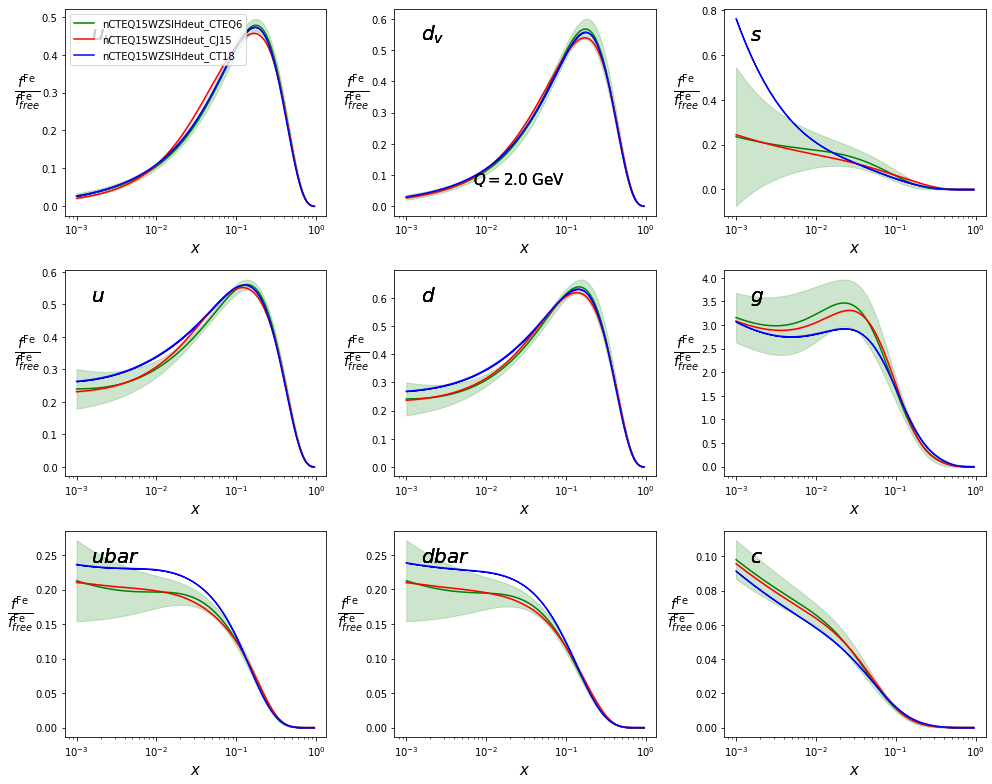

In [3]:

base = PDFs("nCTEQ15WZSIHdet_p27_208_82", "sym", 208, 82, True)
base_cj = PDFs("nCTEQ15WZSIH_deut_CJ15_208_82", "sym", 208, 82, True)
base_ct = PDFs("nCTEQ15WZSIH_deutPCJ_CT18_208_82", "sym", 208, 82, True)
mypdfs = [ [base, "green", "-", "nCTEQ15WZSIHdeut_CTEQ6", True, 0.2], #pdf, color, linestyle, label, fullnuc, error, allpha
           [base_cj, "red", "-", "nCTEQ15WZSIHdeut_CJ15", True, 0.2], 
            [base_ct, "blue", "-", "nCTEQ15WZSIHdeut_CT18", True, True, 0.2], 

]

flavors = ["uv", "dv", "s", "u", "d", "g", "ubar", "dbar", "c"]
Q = 2.0
#xlist = np.linspace(0.001, 1.0,500)
xlist = np.logspace(-3,np.log10(0.95),300)
plt.figure(1,figsize=(14,11))
for iflv, flv in enumerate(flavors) :
    ax=plt.subplot2grid((3,3),(int(iflv/3), iflv%3))   
    plt.tight_layout()
    for pdf in mypdfs : 
        data, dp, dm = pdf[0].getPDFerrors(xlist, Q, flv)
        plt.plot(xlist, data, color=pdf[1], lineStyle=pdf[2], label = pdf[3])

        if (pdf[4]) : 
            plt.fill_between(xlist, ((data+dp)), ((data-dp)), color=pdf[1], alpha=pdf[5])


        #plt.xscale("logit" ,one_half="0.5")
        plt.xscale("log")
        plt.xlabel('$x$',fontsize=15)
        plt.ylabel(r'$\frac{f^{{\mathrm{{Fe}}}}}{f^{{\mathrm{{Fe}}}}_{free}}$    ',fontsize=20, rotation=0)
        if (flv=="uv") : 
            plt.annotate("${}$".format("u_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        elif flv=="dv": 
            plt.annotate("${}$".format("d_v").format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)
        else : 
            plt.annotate("${}$".format(flv).format(Q), xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)

        
        
        if (flv!="s") : 
            pass#plt.ylim(0.6, 1.4)
        else : 
            pass#plt.ylim(0.2, 2.4)

        if (iflv==0):
            plt.legend()
        if (iflv == 1) : 
            plt.annotate("$Q={}\ \mathrm{{GeV}}$".format(Q), xy=(0.3, 0.15), xycoords='axes fraction', fontsize=15)
        #ax.set_xticklabels(["0","0.001", "0.01", "0.1","0.5","0.9", "0.95"])
        
plt.savefig("base-comp.pdf", bbox_inches="tight")